# West vs. East resuspension rate difference classification

Western CAA: 0.125 x resuspension of the eastern CAA
(2019-09-24)

Western CAA: 0.125 x 2e-9 = 0.25e-9. Eastern CAA = 4 x 2e-9 = 5e-9
(2019-11-28)

In [2]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle

%matplotlib notebook

In [5]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

cond2      = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

In [6]:
xmin=1480; xmax=2050
ymin=160;  ymax=800

In [7]:
classification = np.ones_like(mesh_lon)*0.125

In [8]:
classification[1600:1650,650:760] = 4
classification[xmin:1600,302:700] = 4
classification[xmin:1650,350:650] = 4
classification[1600:1750,420:500] = 4
classification[1600:1660,390:430] = 4
classification[1600:1660,460:490] = 4
classification[1600:1675,510:555] = 4

<IPython.core.display.Javascript object>


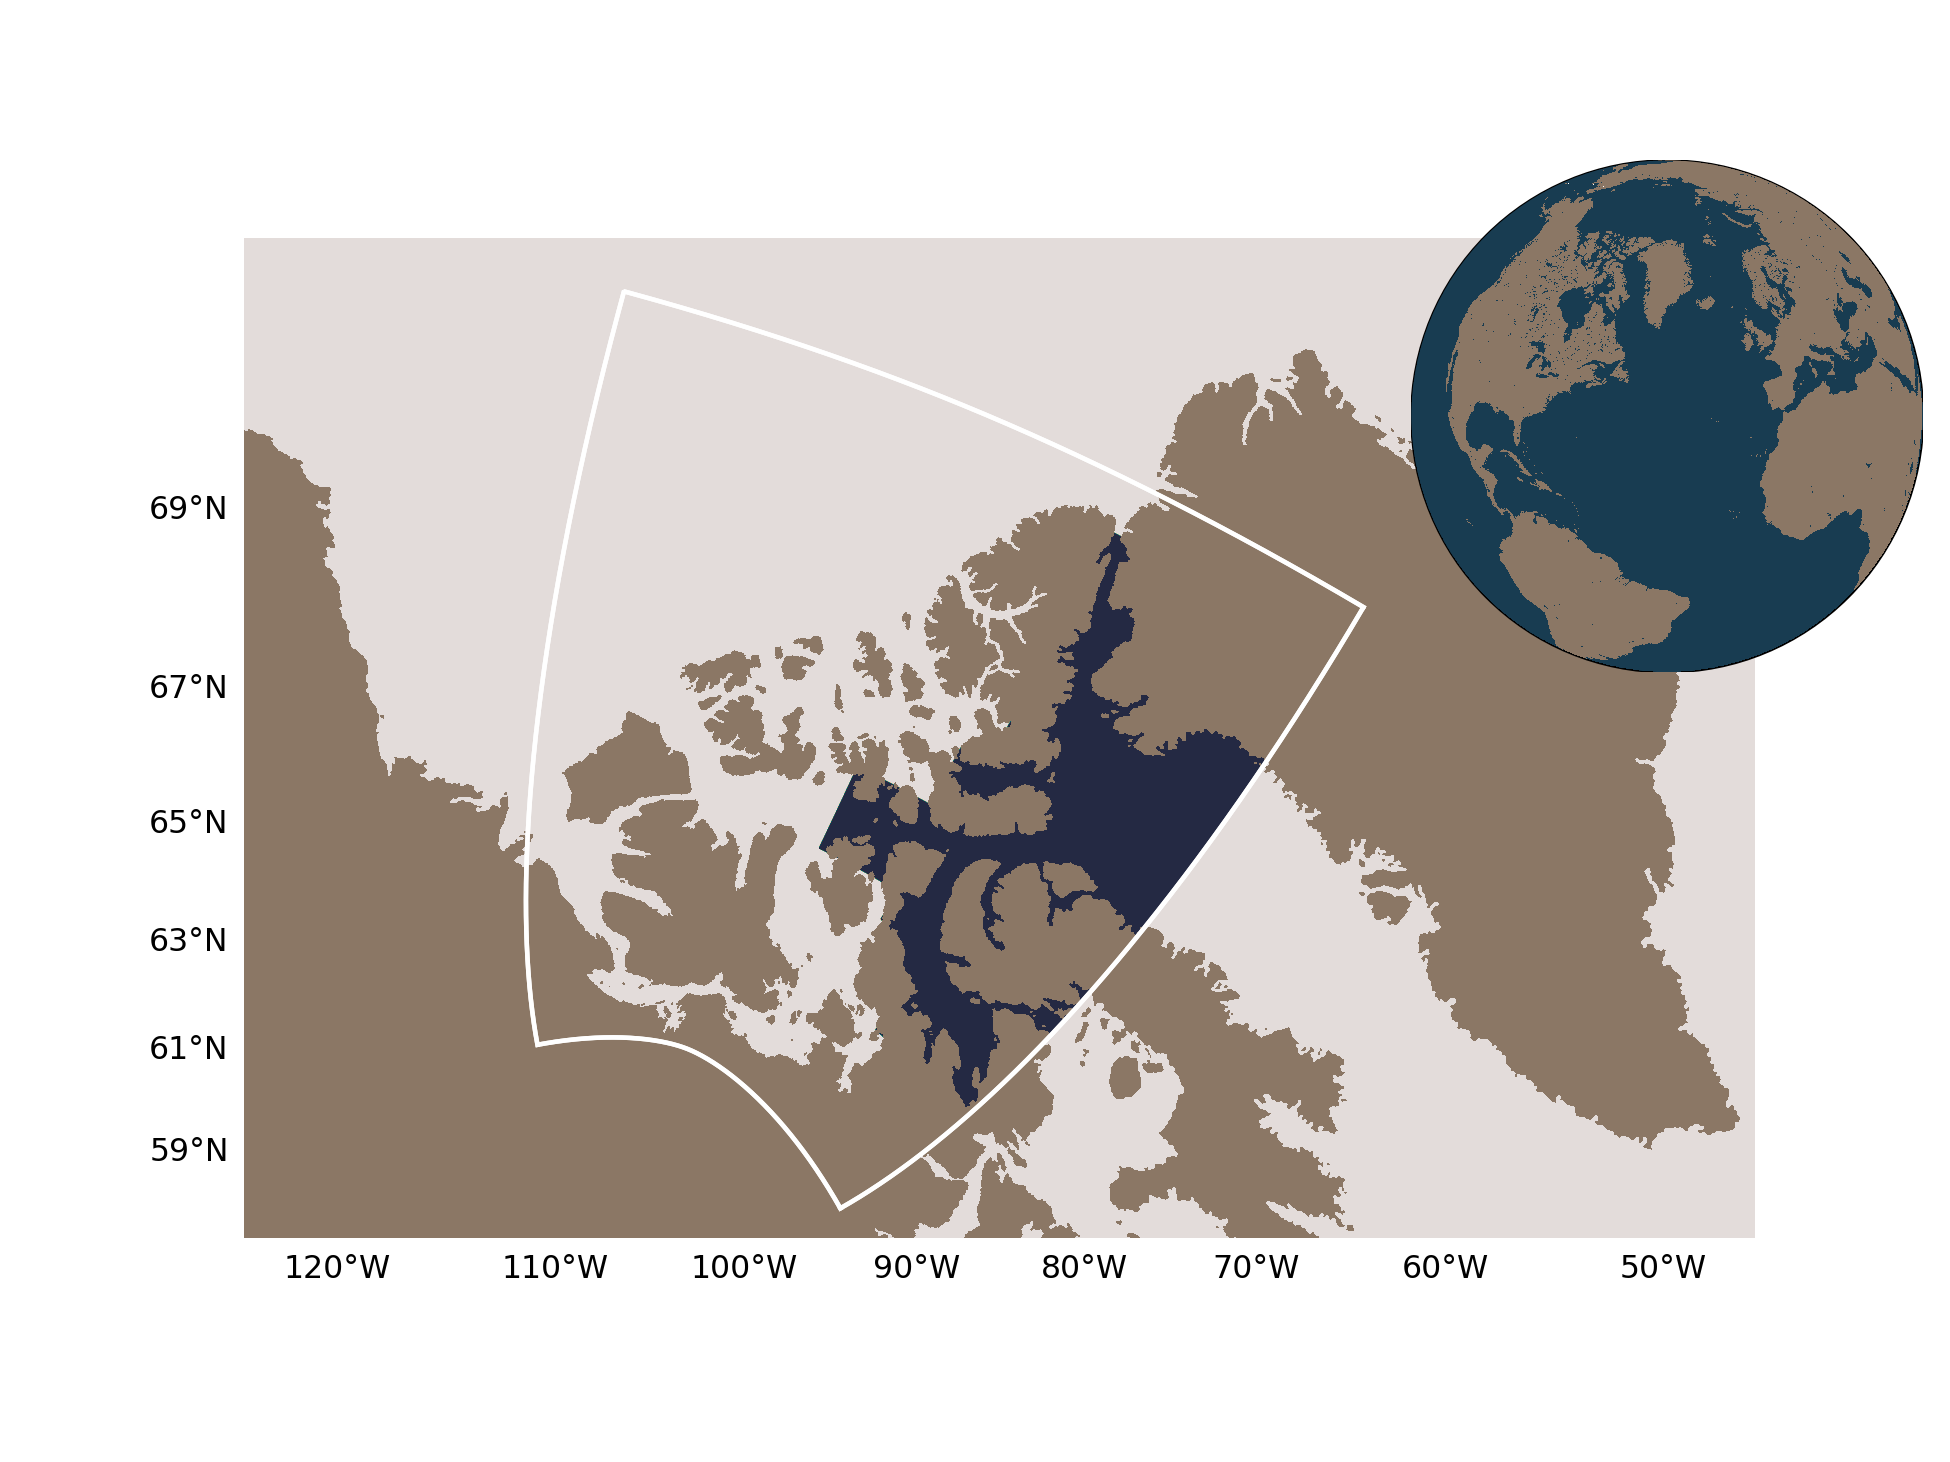

In [9]:
fig, ax1, proj1, ax2, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'surface-land-map-globe.pickle','rb'))
# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[xmin:xmax,ymax],   y_sub[xmin:xmax,ymax],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymax].T, y_sub[xmin:xmax,ymax].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin],   y_sub[xmin:xmax,ymin],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin].T, y_sub[xmin:xmax,ymin].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax],    y_sub[xmin,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax].T,  y_sub[xmin,ymin:ymax].T,  'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax],    y_sub[xmax,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax].T,  y_sub[xmax,ymin:ymax].T,  'w-', lw=2.0,zorder=5)

proj1.contourf(x_sub, y_sub, classification, cmap=cmocean.cm.rain)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain.png', bbox_inches='tight')

# Write to NetCDF file

In [10]:
c   = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12-EXH006_y2015m01d05_gridT.nc','r')
lon = np.array(c.variables['nav_lon'])
lat = np.array(c.variables['nav_lat'])

In [11]:
ncd = nc.Dataset('/ocean/brogalla/GEOTRACES/data/resuspension_rate-20191219.nc', 'w', zlib=True)
ncd.createDimension('x',len(c.dimensions['x']))
ncd.createDimension('y',len(c.dimensions['y']))

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 2400

In [12]:
# variables
nav_lat = ncd.createVariable('nav_lat', 'float32', ('y','x'))
nav_lat.long_name = 'Latitude'
nav_lat.units = 'degrees_north'
nav_lat[:] = lat

nav_lon = ncd.createVariable('nav_lon', 'float32', ('y','x'))
nav_lon.long_name = 'Longitude'
nav_lon.units = 'degrees_east'
nav_lon[:] = lon

mn_resus = ncd.createVariable('dmn_resus', 'float32', ('y','x'))
mn_resus.units = 'NA'
mn_resus.long_name = 'Resuspension classification'  
mn_resus.coordinates = 'nav_lon nav_lat'
mn_resus[:] = classification

In [13]:
ncd.close()

In [15]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/data/resuspension_rate-20191219.nc','r')
print(np.amax(c.variables['dmn_resus']))
print(np.amin(c.variables['dmn_resus']))
print(np.average(c.variables['dmn_resus']))

4.0
0.125
0.20185594
